In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import Tensor
import matplotlib.pyplot as plt

## BCE from scratch

In [2]:
def binary_cross_entropy(yhat, y):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()

# any input will become a bounded output, such as example_predictions below
def sigmoid(x):
    return np.round(1 / (1 + np.exp(-x)), 4)

In [3]:
example_predictions = np.arange(0.000001, 0.999999, 0.000001) # example probability outputs
target = np.ones(len(example_predictions)) # target labels

In [4]:
bce_losses = []
for i in range(len(example_predictions)):
    bce_losses.append(binary_cross_entropy(example_predictions[i], target[i]))

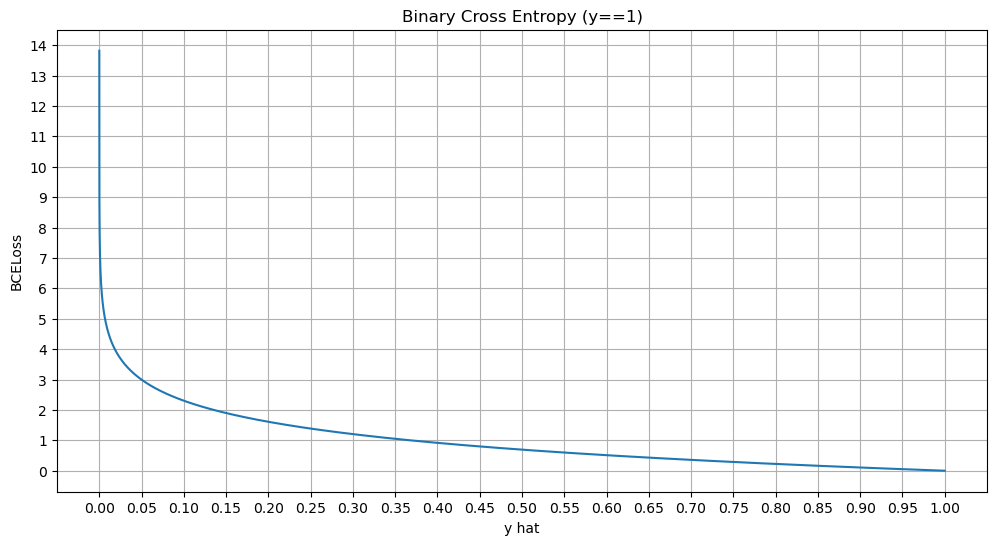

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Binary Cross Entropy (y==1)")
plt.xlabel("y hat")
plt.xticks(np.arange(0, 1.1, 0.05))
plt.yticks(np.arange(0, 15, 1))
plt.ylabel("BCELoss")
plt.plot(example_predictions, bce_losses)
plt.grid(True)

In [6]:
zero_input = np.arange(0.000001, 0.999999, 0.000001) # example probability outputs
zero_target = np.zeros(len(zero_input)) # target labels

In [7]:
zero_bce_losses = []
for i in range(len(zero_input)):
    zero_bce_losses.append(binary_cross_entropy(zero_input[i], zero_target[i]))

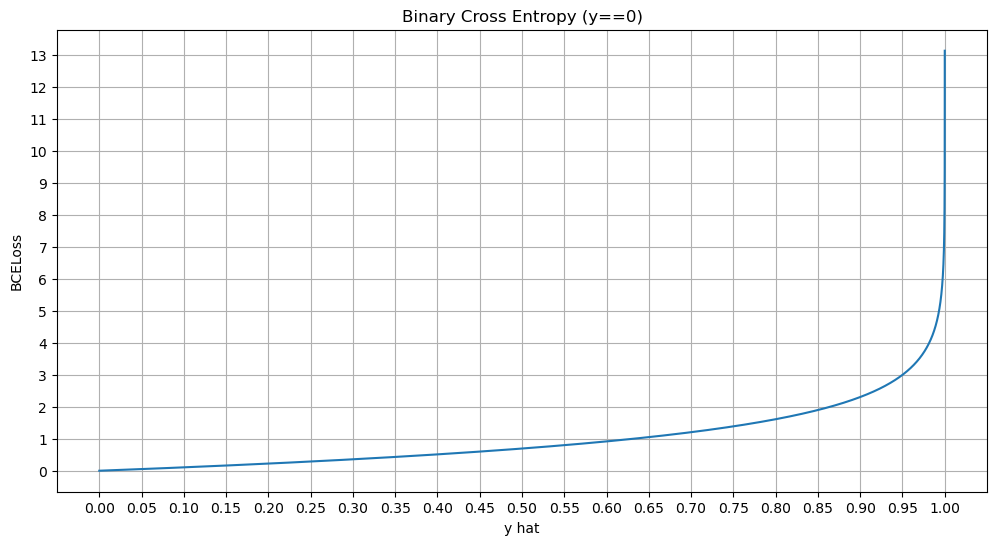

In [8]:
plt.figure(figsize=(12, 6))
plt.title("Binary Cross Entropy (y==0)")
plt.xlabel("y hat")
plt.xticks(np.arange(0, 1.1, 0.05))
plt.yticks(np.arange(0, 15, 1))
plt.ylabel("BCELoss")
plt.plot(zero_input, zero_bce_losses)
plt.grid(True)

## BCE from PyTorch

In [9]:
torch_loss_fn = nn.BCELoss()
torch_sigmoid = nn.Sigmoid()

In [10]:
torch_input = torch.as_tensor(np.arange(0.000001, 0.999999, 0.000001), dtype=torch.float64)
torch_target = torch.ones(len(torch_input), dtype=torch.float64)
torch_output = torch_sigmoid(torch_input)

In [11]:
torch_loss_fn(torch_output, torch_target).item()

0.4838191881926662

In [12]:
binary_cross_entropy(sigmoid(example_predictions), target) # slight precision difference between the methods after 7 decimal places

0.4838191978763779